In [2]:
import pandas as pd 
import numpy as np
import timeit
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from utilities import *

### 0. Load Payoffs from optimized policies

In [4]:
import pickle
payoffs = load_data('../model/data/processed/50yr_all.pickle')

with open('../output/processed/best_policies.pickle', "rb") as f:
    best_policies = pickle.load(f)
    best_policies = list(set(best_policies.values()))

payoffs = payoffs[payoffs.index.isin(best_policies)]

# normalize payoffs
normalized_payoffs = normalize(payoffs)

In [5]:
normalized_payoffs.set_index('decision')

,hydropower_revenue,atomic_power_plant_discharge,baltimore_discharge,chester_discharge,recreation,environment,flood_risk
decision,,,,,,,
policy7,0.363697,0.905726,0.049545,0.679306,0.000000,0.046887,1.000000
policy15,1.000000,0.000000,0.000000,0.000000,0.256158,1.000000,0.354528
policy16,0.031849,1.000000,0.920929,1.000000,0.120690,0.000000,0.000000
policy28,0.000000,0.881548,0.616917,0.827044,1.000000,0.216248,0.035934
policy30,0.595018,0.182508,1.000000,0.132284,0.256158,0.679173,0.555687
policy46,0.452163,0.527492,0.660603,0.353295,0.753695,0.422312,0.667355


In [6]:
payoffs

,hydropower_revenue,atomic_power_plant_discharge,baltimore_discharge,chester_discharge,recreation,environment,flood_risk
policy7,26.805644,0.642111,0.253106,0.499968,0.105000,-0.258350,-0.654308
policy15,31.595089,0.358669,0.236321,0.292729,0.142143,-0.098953,-1.141051
policy16,24.307824,0.671614,0.548312,0.597803,0.122500,-0.266191,-1.408397
policy28,24.068095,0.634545,0.445319,0.545038,0.250000,-0.230026,-1.381300
policy30,28.546794,0.415784,0.575099,0.333086,0.142143,-0.152607,-0.989359
policy46,27.471527,0.523745,0.460119,0.400510,0.214286,-0.195564,-0.905152


#### 1. Identify the preference direction for each actor among the different outcomes and map them

- Each node is one outcome
- The edge is directed from node that is less preferred to node that is more preferred

- Green indicates most favourable outcome
- Red indicates least favourable outcome
- The line is *one* longest route from least preferred to most preferred outcome


In [14]:
%reload_ext autoreload
%autoreload 2
from bargaining_games import bargainingGames
graphs = []
actors = ["hydropower_revenue", "atomic_power_plant_discharge","baltimore_discharge", "chester_discharge", "recreation" , "environment", "flood_risk"]

game = bargainingGames(payoffs, actors)
game.set_parameters()

for i in actors:
    graphs.append(game.preference_direction([i]))
all_outcome = game.preference_direction(actors)

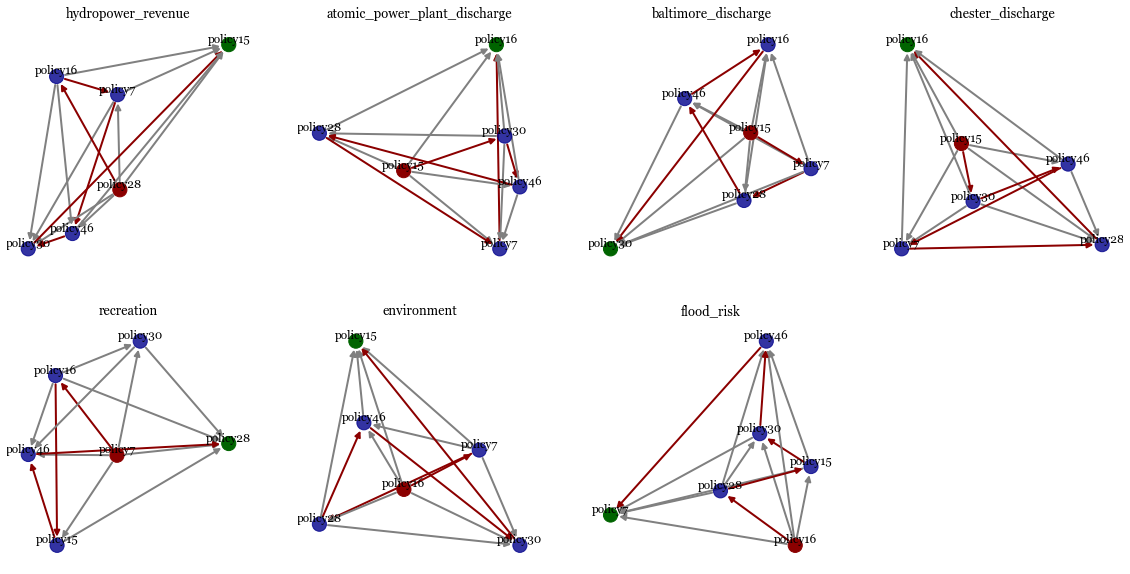

In [8]:
game.plot_aggregation(graphs, 'cardinal_resultant', actors)

####  2. Aggregate the preferences across all actors 

3 types of aggregation can be seen - 
- Cardinal resultant: The preference direction is weighted based on the incraese in cardinal utility of each node
- Resultant: The preference direction is weighted as 1 if there is any increase in utility
- Total utility: The node adds all the normalized utility values and points to the highest one 

{'policy7': array([ 0.13909726, -2.        ]), 'policy15': array([1.63784725, 1.10417117]), 'policy16': array([-0.13340775,  1.95691638]), 'policy28': array([-1.60533389, -1.08271161]), 'policy30': array([ 1.75978156, -0.85477996]), 'policy46': array([-1.79798442,  0.87640402])}


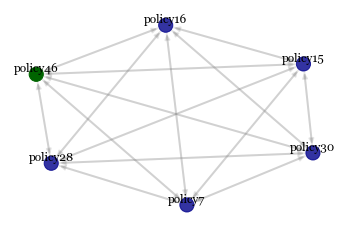

In [15]:
game.combined_graph(all_outcome, 'total_utility')

In [17]:
[(all_outcome.nodes[node]['total_utility'], node) for node in all_outcome.nodes]

[(3.0451610268725977, 'policy7'),
 (2.6106857719946435, 'policy15'),
 (3.073467375775361, 'policy16'),
 (3.5776901153993172, 'policy28'),
 (3.4008282994954975, 'policy30'),
 (3.8369154015278513, 'policy46')]